# Import all useful libreary

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

# Input data files are available in the "../input/" directory.

import os

# Any results you write to the current directory are saved as output.

# Reading DataFrame

In [2]:
tele4_df=pd.read_csv('Telco_Customer_Data.csv')

tele4_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
tele4_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Checking for Data types

In [4]:
# Checking the data types of all the columns
tele4_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# finding null values and assigning numerical values

In [5]:
# Converting Total Charges to a numerical data type.
tele4_df.TotalCharges = pd.to_numeric(tele4_df.TotalCharges, errors='coerce')
tele4_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Droping unnecessary columns

In [6]:
#Removing missing values 
tele4_df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = tele4_df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

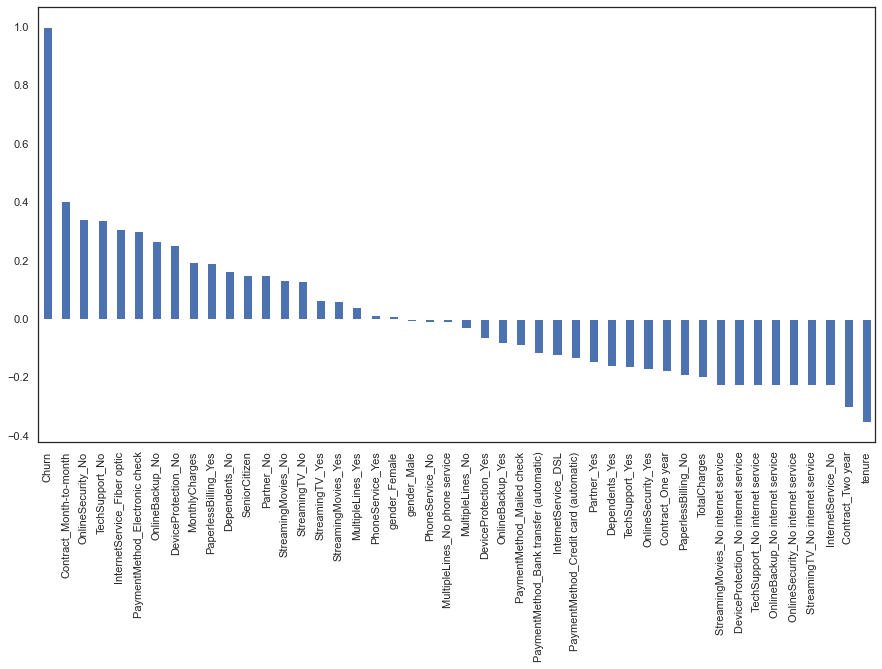

In [7]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [8]:
tele4_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# TestTrain Split

In [9]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [10]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Logistic regression

In [11]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [12]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8075829383886256


AxesSubplot(0.125,0.125;0.775x0.755)


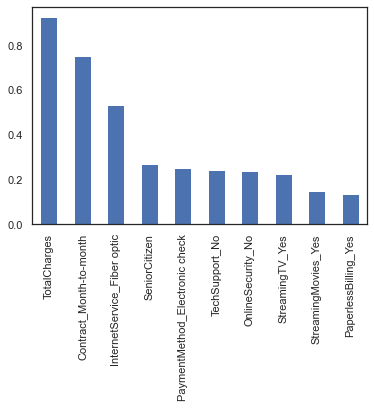

In [13]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

In [14]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8088130774697939


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [16]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [17]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds)) 

[[953  89]
 [164 201]]


In [18]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8159203980099502

# Lasso

In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso_reg=Lasso(alpha=3)

lasso_reg.fit(X_train,y_train)

coeff=lasso_reg.coef_

len(coeff[coeff==0])

45

# Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
dt.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

# Random forest Regressior

In [24]:
from sklearn.ensemble import RandomForestRegressor 

In [25]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [26]:
n_estimators=list(range(20,200,20))
accuracy=[]

for num in n_estimators:
    regressor.fit(X_train,y_train)
    accuracy.append(regressor.score(X_train,y_train))

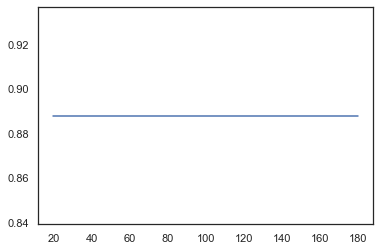

In [27]:
import matplotlib.pyplot as plt

plt.plot(n_estimators,accuracy)

# Ada Boost Classifier

In [28]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [29]:
learning_rate=[0.2,0.4,0.6,0.8]
n_estimators=np.arange(10,200,20)
accuracy=[]

for n_est in n_estimators:
    for num in learning_rate:
        abc=AdaBoostClassifier(learning_rate=num)
        abc.fit(X_train, y_train)
        accuracy.append(abc.score(X_train, y_train))
        

In [30]:
predictions=abc.predict(X_train)
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Hyperparameter Tuning
Grid search CV

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
rf=RandomForestRegressor(random_state=42)

param_dict={'n_estimators':[50,60,70,100],
            'min_samples_split':[4,7,9],
            'max_depth':[7,8,9,10],
            'max_features':['auto','sqrt','log2']}

gcv=GridSearchCV(rf,param_grid=param_dict,cv=5,verbose=5)

gcv.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50, score=0.261, total=   4.8s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50, score=0.271, total=   4.9s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s


[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50, score=0.287, total=   6.3s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.0s remaining:    0.0s


[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50, score=0.319, total=   4.1s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   20.1s remaining:    0.0s


[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=50, score=0.270, total=   4.8s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60, score=0.260, total=   6.0s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60, score=0.271, total=   4.9s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60, score=0.286, total=   5.4s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60, score=0.321, total=   9.2s
[CV] max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=7, max_features=auto, min_samples_split=4, n_estimators=60, score=0.272, total=   7.3s
[CV] ma

[CV]  max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70, score=0.262, total=   5.1s
[CV] max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70 
[CV]  max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70, score=0.269, total=   5.2s
[CV] max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70 
[CV]  max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70, score=0.289, total=   5.6s
[CV] max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70 
[CV]  max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70, score=0.320, total=   6.8s
[CV] max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70 
[CV]  max_depth=7, max_features=auto, min_samples_split=9, n_estimators=70, score=0.273, total=   6.3s
[CV] max_depth=7, max_features=auto, min_samples_split=9, n_estimators=100 
[CV]  max_depth=7, max_features=auto, min_samples_split=9, n_estimators=100, score=0.264, total=   7.7s
[CV] 

[CV]  max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.276, total=   2.3s
[CV] max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.294, total=   2.3s
[CV] max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.318, total=   2.3s
[CV] max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.292, total=   2.2s
[CV] max_depth=7, max_features=sqrt, min_samples_split=9, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.267, total=   1.2s
[CV] max_depth=7, max_features=sqrt, min_samples_split=9, n_estimators=50 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.278, total=   1.2s


[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=50, score=0.291, total=   1.1s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=50, score=0.319, total=   1.1s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=50 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=50, score=0.287, total=   1.1s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60, score=0.266, total=   1.4s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60, score=0.279, total=   1.4s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=60, score=0.292, total=   1.3s
[CV] ma

[CV]  max_depth=8, max_features=auto, min_samples_split=4, n_estimators=60, score=0.314, total=   5.0s
[CV] max_depth=8, max_features=auto, min_samples_split=4, n_estimators=60 
[CV]  max_depth=8, max_features=auto, min_samples_split=4, n_estimators=60, score=0.262, total=   4.9s
[CV] max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70 
[CV]  max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70, score=0.257, total=   6.0s
[CV] max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70 
[CV]  max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70, score=0.258, total=   5.9s
[CV] max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70 
[CV]  max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70, score=0.286, total=   5.9s
[CV] max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70 
[CV]  max_depth=8, max_features=auto, min_samples_split=4, n_estimators=70, score=0.311, total=   5.8s
[CV] ma

[CV]  max_depth=8, max_features=auto, min_samples_split=9, n_estimators=70, score=0.266, total=   8.5s
[CV] max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100, score=0.260, total=   9.0s
[CV] max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100, score=0.258, total=   8.9s
[CV] max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100, score=0.285, total=   7.9s
[CV] max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100, score=0.314, total=   7.8s
[CV] max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=9, n_estimators=100, score=0.269, total=   7.

[CV]  max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.263, total=   1.2s
[CV] max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.278, total=   1.3s
[CV] max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.293, total=   1.2s
[CV] max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.321, total=   1.2s
[CV] max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.289, total=   1.3s
[CV] max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=60 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.263, total=   1.5s
[CV] ma

[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=60, score=0.278, total=   1.5s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=60 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=60, score=0.290, total=   1.5s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=60 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=60, score=0.322, total=   1.5s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=60 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=60, score=0.290, total=   1.5s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=70 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=70, score=0.267, total=   1.6s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=70 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=70, score=0.278, total=   1.7s
[CV] ma

[CV]  max_depth=9, max_features=auto, min_samples_split=4, n_estimators=70, score=0.281, total=   5.9s
[CV] max_depth=9, max_features=auto, min_samples_split=4, n_estimators=70 
[CV]  max_depth=9, max_features=auto, min_samples_split=4, n_estimators=70, score=0.300, total=   5.9s
[CV] max_depth=9, max_features=auto, min_samples_split=4, n_estimators=70 
[CV]  max_depth=9, max_features=auto, min_samples_split=4, n_estimators=70, score=0.258, total=   5.9s
[CV] max_depth=9, max_features=auto, min_samples_split=4, n_estimators=100 
[CV]  max_depth=9, max_features=auto, min_samples_split=4, n_estimators=100, score=0.246, total=   8.5s
[CV] max_depth=9, max_features=auto, min_samples_split=4, n_estimators=100 
[CV]  max_depth=9, max_features=auto, min_samples_split=4, n_estimators=100, score=0.244, total=   8.6s
[CV] max_depth=9, max_features=auto, min_samples_split=4, n_estimators=100 
[CV]  max_depth=9, max_features=auto, min_samples_split=4, n_estimators=100, score=0.281, total=   8.5s
[

[CV]  max_depth=9, max_features=auto, min_samples_split=9, n_estimators=100, score=0.307, total=   8.5s
[CV] max_depth=9, max_features=auto, min_samples_split=9, n_estimators=100 
[CV]  max_depth=9, max_features=auto, min_samples_split=9, n_estimators=100, score=0.265, total=   8.3s
[CV] max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50, score=0.265, total=   1.3s
[CV] max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50, score=0.278, total=   1.3s
[CV] max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50, score=0.291, total=   1.3s
[CV] max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=4, n_estimators=50, score=0.317, total=   1.3s
[CV]

[CV]  max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=50, score=0.284, total=   1.3s
[CV] max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.264, total=   1.5s
[CV] max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.278, total=   1.5s
[CV] max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.289, total=   1.5s
[CV] max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.321, total=   1.5s
[CV] max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60 
[CV]  max_depth=9, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.283, total=   1.5s
[CV] ma

[CV]  max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70, score=0.267, total=   1.8s
[CV] max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70 
[CV]  max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70, score=0.272, total=   1.7s
[CV] max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70 
[CV]  max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70, score=0.294, total=   1.7s
[CV] max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70 
[CV]  max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70, score=0.319, total=   1.7s
[CV] max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70 
[CV]  max_depth=9, max_features=log2, min_samples_split=7, n_estimators=70, score=0.287, total=   1.7s
[CV] max_depth=9, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=9, max_features=log2, min_samples_split=7, n_estimators=100, score=0.268, total=   2.4s
[CV] 

[CV]  max_depth=10, max_features=auto, min_samples_split=4, n_estimators=100, score=0.231, total=   9.0s
[CV] max_depth=10, max_features=auto, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=4, n_estimators=100, score=0.277, total=   8.8s
[CV] max_depth=10, max_features=auto, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=4, n_estimators=100, score=0.296, total=   8.9s
[CV] max_depth=10, max_features=auto, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_split=4, n_estimators=100, score=0.250, total=   8.8s
[CV] max_depth=10, max_features=auto, min_samples_split=7, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_split=7, n_estimators=50, score=0.235, total=   4.4s
[CV] max_depth=10, max_features=auto, min_samples_split=7, n_estimators=50 
[CV]  max_depth=10, max_features=auto, min_samples_split=7, n_estimators=50, score=0.238, tot

[CV]  max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50, score=0.282, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50, score=0.315, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50, score=0.272, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.266, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.262, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=60, score=0.284, total=   1

[CV]  max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.321, total=   1.6s
[CV] max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=60 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=60, score=0.285, total=   1.7s
[CV] max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70, score=0.263, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70, score=0.271, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70, score=0.289, total=   1.9s
[CV] max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70 
[CV]  max_depth=10, max_features=sqrt, min_samples_split=9, n_estimators=70, score=0.322, total=   1

[CV]  max_depth=10, max_features=log2, min_samples_split=7, n_estimators=70, score=0.286, total=   1.8s
[CV] max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100, score=0.265, total=   2.5s
[CV] max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100, score=0.273, total=   2.5s
[CV] max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100, score=0.289, total=   2.5s
[CV] max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100, score=0.321, total=   2.5s
[CV] max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=10, max_features=log2, min_samples_split=7, n_estimators=100, score=0.287, 

[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed: 38.8min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [4, 7, 9],
                         'n_estimators': [50, 60, 70, 100]},
             verbose=5)

# K_Means Clustring

In [ ]:
#WSS(within sum of squares)
#K stands for no of clusters
#Clustring means unsupervised learning

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Elbow Curve')

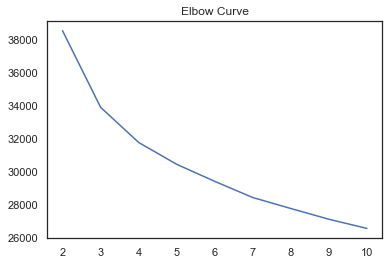

In [34]:
#kmeans=KMeans()
#kmeans.fit(x_train)
#finding the optimal number of clusters

num_clusters=range(2,11)
wss=[]

for n in num_clusters:
    kmeans=KMeans(n_clusters=n)
    kmeans.fit(X_train)
    wss.append(kmeans.inertia_)
    
plt.plot(num_clusters,wss)
plt.title('Elbow Curve')
